In [5]:
import pandas as pd
from pandas import DataFrame, TimeSeries
import numpy as np

In [9]:
!ls

average-monthly-temperatures-acr.csv  Untitled1.ipynb  Untitled5.ipynb
b.csv				      Untitled2.ipynb  Untitled.ipynb
c.csv				      Untitled3.ipynb  zg-averages-data.xlsx
d.csv				      Untitled4.ipynb


In [19]:
df=pd.read_excel("zg-averages-data.xlsx")
(df.tail())

,year,mon,avg
547,1996,8,20.7
548,1996,9,14.1
549,1996,10,12.2
550,1996,11,8.3
551,1996,12,-0.9


In [14]:
type(df)

pandas.core.frame.DataFrame

In [58]:
df[0::12]
#samo 1. mjeseci u godini 

type(df ["year"])

pandas.core.series.Series

In [34]:
df.year.tail()

547    1996
548    1996
549    1996
550    1996
551    1996
Name: year, dtype: int64

In [42]:
df1=df[(df.year < 1980)]
#df1[df1.year>1970]

In [46]:
df[df.avg<0]
all(df.avg<0)

False

In [49]:
#graf temperatura za 1994
df[df.year == 1994]


,year,mon,avg
516,1994,1,3.8
517,1994,2,3.0
518,1994,3,10.6
519,1994,4,11.3
520,1994,5,16.1
521,1994,6,19.8
522,1994,7,23.0
523,1994,8,22.5
524,1994,9,19.0
525,1994,10,9.7


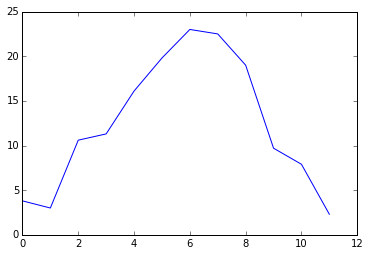

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(df[df.year == 1994].avg)

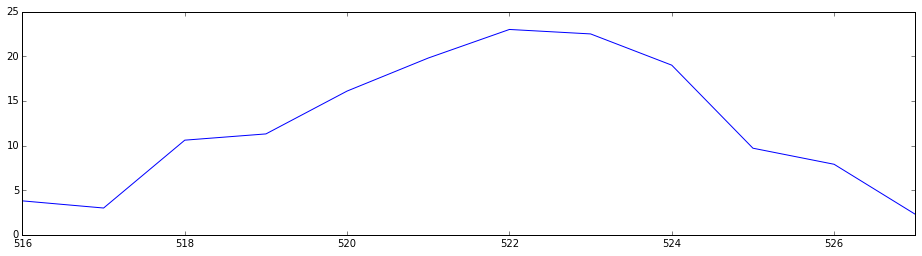

In [55]:
y1994=df[df.year == 1994].avg
y1994.plot(figsize=(16,4))

In [78]:
i=1
L=[]
while(i<13):
    df[df.mon==i]
    c=df.avg[df.mon==i]
    L.append(np.average(c))
    i=i+1
L

[-0.31521739130434784,
 1.7021739130434781,
 6.0913043478260871,
 10.691304347826087,
 15.263043478260871,
 18.699999999999999,
 20.43695652173913,
 19.882608695652173,
 16.210869565217394,
 10.845652173913043,
 5.4891304347826084,
 1.191304347826087]

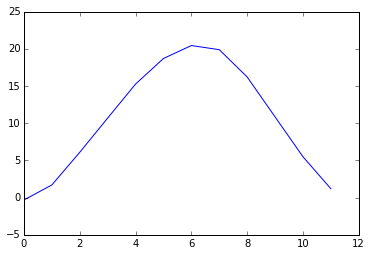

In [80]:
plt.plot(L)

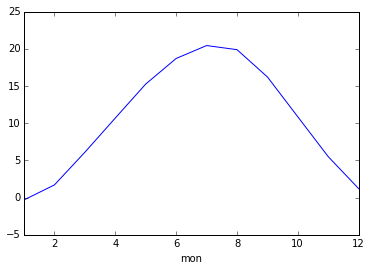

In [84]:
g=df.groupby("mon")
g.aggregate(np.mean).avg.plot()

In [101]:
# korelacija mjesec prosjek dali su korelirani za 1 i 2 polovicu godine
#df[["mon","avg"]].corr()
sf=df[["mon","avg"]]
p1=sf[sf.mon<7].corr()
p1

,mon,avg
mon,1.000000,0.951534
avg,0.951534,1.000000


In [104]:
p2=sf[sf.mon>6].corr()
p2

,mon,avg
mon,1.000000,-0.959003
avg,-0.959003,1.000000


In [112]:
#zadatak: dodati stupac nekakvo odstupanje
df["odst"] =0
df.head()
#U stupac '''d.odst''' upisati odstupanje od prosjeka 

,year,mon,avg,odst
0,1951,1,2.9,0
1,1951,2,5.0,0
2,1951,3,6.2,0
3,1951,4,11.1,0
4,1951,5,15.6,0


In [132]:
i=1

while(i<13):
    df["odst"]=df[df.mon==i].avg- L[i-1]
    i=i+1

In [147]:
prosjeci=df.groupby("mon").aggregate(np.mean).avg.values

def f_odst(m,a):
    return (a-prosjeci[m-1])

In [151]:
df.odst = f_odst(m=df.mon, a= df.avg)


In [153]:
df["novi stupac"]=0
#Kako obrisati stupac? 

del df["novi stupac"]
df.head()

,year,mon,avg,odst
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


In [165]:
df.columns=["YEAR", "MON","AVG","ODST"]
df.head()

,YEAR,MON,AVG,ODST
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


In [170]:
r=np.arange(1,100)

In [171]:
def fe(x):
    return x+2

In [172]:
fe(r)

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

In [173]:
fv=np.vectorize(fe)

In [176]:
fv(r)

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

In [177]:
df["pros"]=0

In [178]:
df.head()

,YEAR,MON,AVG,ODST,pros
0,1951,1,2.9,3.215217,0
1,1951,2,5.0,3.297826,0
2,1951,3,6.2,0.108696,0
3,1951,4,11.1,0.408696,0
4,1951,5,15.6,0.336957,0


In [179]:
def kon(a):
    return a*1.8+32

In [180]:
df.pros = kon(a= df.AVG)

In [181]:
df.head()

,YEAR,MON,AVG,ODST,pros
0,1951,1,2.9,3.215217,37.22
1,1951,2,5.0,3.297826,41.00
2,1951,3,6.2,0.108696,43.16
3,1951,4,11.1,0.408696,51.98
4,1951,5,15.6,0.336957,60.08


In [184]:
np.min(df[0::12].AVG)

-7.0

In [191]:
(df[6::12].AVG).max()

23.0

In [189]:
i=0
T=[]
while(i<12):
    T.append(np.min(df[i::12].AVG))
    i=i+1

In [190]:
T

[-7.0,
 -8.1999999999999993,
 2.0,
 8.4000000000000004,
 12.1,
 16.399999999999999,
 18.199999999999999,
 16.899999999999999,
 13.6,
 7.0,
 1.5,
 -3.6000000000000001]